In [71]:
import pandas as pd

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'C:\\Users\\Owner\\OneDrive\\Desktop\\machine learning\\organics.csv'   # Replace with actual file path
df = pd.read_csv(file_path)

# Keep `TargetAmt` for exploratory analysis
eda_df = df[['TargetBuy', 'TargetAmt']]  # Use this for EDA if needed

# Drop irrelevant and problematic columns for modeling
df = df.drop(['ID'], axis=1)  # Drop ID (irrelevant for analysis)

# Handle missing values
df = df.fillna({
    'DemAffl': df['DemAffl'].median(),
    'DemAge': df['DemAge'].median(),
    'DemCluster': df['DemCluster'].mode()[0],
    'DemClusterGroup': 'Unknown',
    'DemGender': 'U',
    'DemRegion': 'Unknown',
    'DemTVReg': 'Unknown',
    'PromClass': 'Unknown',
    'PromSpend': df['PromSpend'].median(),
    'PromTime': df['PromTime'].median(),
})

# Convert nominal variables to dummy variables
nominal_columns = ['DemCluster', 'DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']
X = df.drop(['TargetBuy', 'TargetAmt'], axis=1)  # Exclude `TargetBuy` and `TargetAmt` for modeling
X = pd.get_dummies(X, columns=nominal_columns, drop_first=True, dtype='float')

# Define the target variable
y = df['TargetBuy']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display summary
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Target distribution in training set:\n", y_train.value_counts(normalize=True))


Training features shape: (15556, 87)
Testing features shape: (6667, 87)
Target distribution in training set:
 TargetBuy
0    0.752314
1    0.247686
Name: proportion, dtype: float64


In [73]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [74]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)



DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")


'decision_tree_default.pdf'

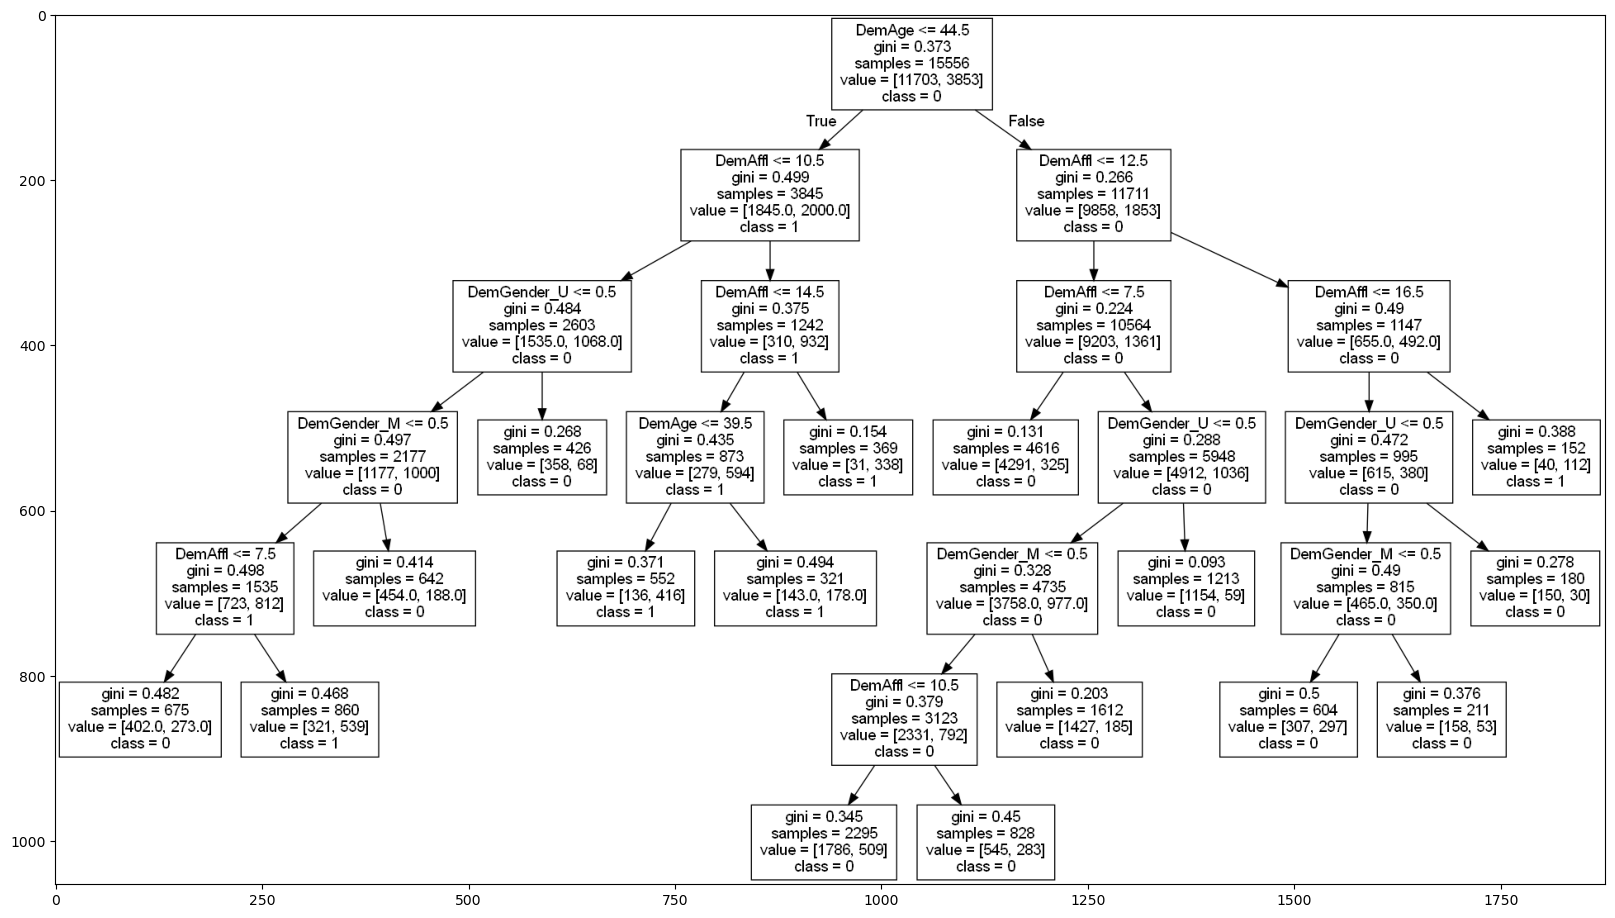

In [76]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)
plt.show()

In [77]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)



In [78]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8109
Precision: 0.7023
Recall.  : 0.4108

 -- test set -- 
Accuracy : 0.8118
Precision: 0.7019
Recall.  : 0.4177


In [79]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[11032  2270]
 [  671  1583]]
[[4722  962]
 [ 293  690]]


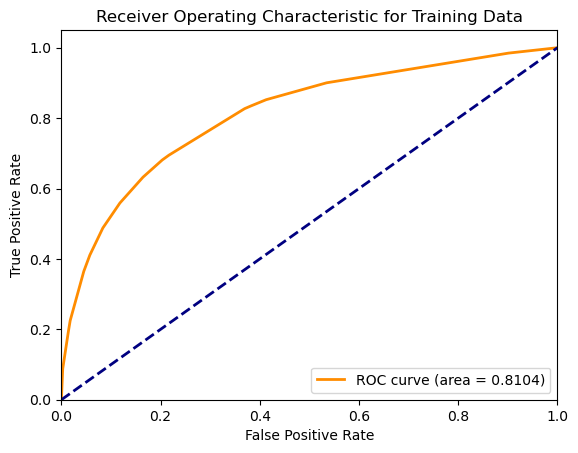

In [83]:

# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train[:, 1])  # Ensure y_train is numeric
roc_auc = roc_auc_score(y_train, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


    importance          feature
1     0.493213           DemAge
0     0.352681          DemAffl
66    0.084322      DemGender_U
65    0.069784      DemGender_M
54    0.000000  DemCluster_52.0
..         ...              ...
27    0.000000  DemCluster_25.0
26    0.000000  DemCluster_24.0
25    0.000000  DemCluster_23.0
24    0.000000  DemCluster_22.0
86    0.000000    PromClass_Tin

[87 rows x 2 columns]


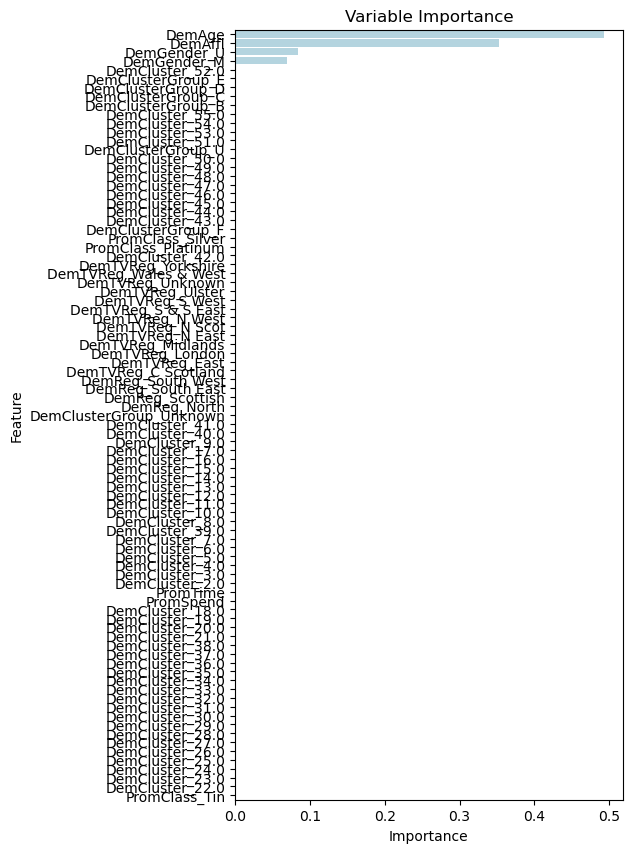

In [84]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [85]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 50}
DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=50)


RANDOM FOREST


In [86]:
rf = RandomForestClassifier(n_estimators=150, max_features=6, max_depth=None, min_samples_leaf=1, random_state=904)

# fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=150, random_state=904)

In [87]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)



In [88]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9996
Precision: 0.9995
Recall.  : 0.9990

 -- test set -- 
Accuracy : 0.8041
Precision: 0.6784
Recall.  : 0.3983


In [89]:
rf_tune = RandomForestClassifier()

param_grid = {
    'n_estimators':[10, 50, 150, 500],
    'max_features':['sqrt', 2, 4, 6],
    'max_depth': [None, 5],
    'min_samples_leaf': [1, 100],
}

grid_search = GridSearchCV(rf_tune, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 150}
RandomForestClassifier(n_estimators=150)


TUNED RANDOM FOREST

In [90]:
rf = RandomForestClassifier(
    n_estimators=150, 
    max_features='sqrt', 
    max_depth=None, 
    min_samples_leaf=1, 
    random_state=904
)

# Fit the model to the training data
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=904)

In [91]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)


In [92]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9996
Precision: 0.9995
Recall.  : 0.9990

 -- test set -- 
Accuracy : 0.8085
Precision: 0.6851
Recall.  : 0.4201


GRADIENT BOOSTING

In [93]:
# create an instance of the Gradient Boosting Classifier using default values

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=3, random_state=904)


# fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=904)

In [94]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)


In [95]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8208
Precision: 0.7181
Recall.  : 0.4555

 -- test set -- 
Accuracy : 0.8163
Precision: 0.7039
Recall.  : 0.4461


In [106]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for AUC calculation
y_prob_train_gb = gb.predict_proba(X_train)[:, 1]  # Probabilities for the positive class (1)
y_prob_test_gb = gb.predict_proba(X_test)[:, 1]    # Probabilities for the positive class (1)

# Calculate AUC for train and test sets
train_auc_gb = roc_auc_score(y_train, y_prob_train_gb)
test_auc_gb = roc_auc_score(y_test, y_prob_test_gb)

# Print AUC scores
print(" -- AUC Scores -- ")
print("Train AUC: {:.4f}".format(train_auc_gb))
print("Test AUC : {:.4f}".format(test_auc_gb))



 -- AUC Scores -- 
Train AUC: 0.8394
Test AUC : 0.8253


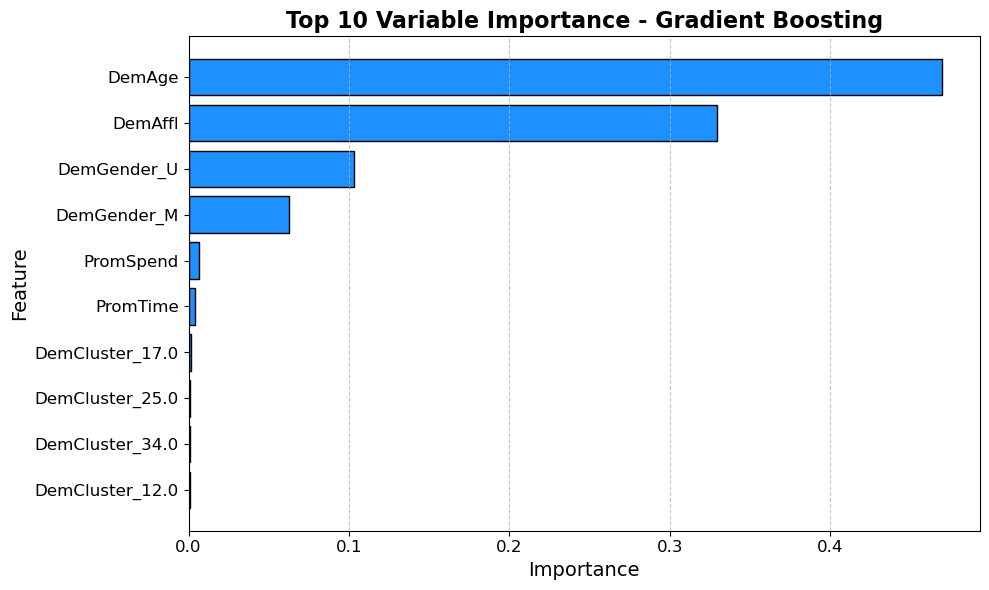

In [110]:
# Enhance the visualization by displaying only the top 10 features for better clarity

# Filter the top 10 features
top_features = importance_df.tail(10)  # Since the DataFrame is sorted ascending

# Create a clearer plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='dodgerblue', edgecolor='black')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top 10 Variable Importance - Gradient Boosting', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the updated plot
plt.tight_layout()
plt.savefig('top_10_variable_importance.png', dpi=300)
plt.show()


TUNED CLASSIFICATION TREE

In [96]:
# create an instance of a decision tree classifier using default values


dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=50, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)


DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=50)

In [97]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

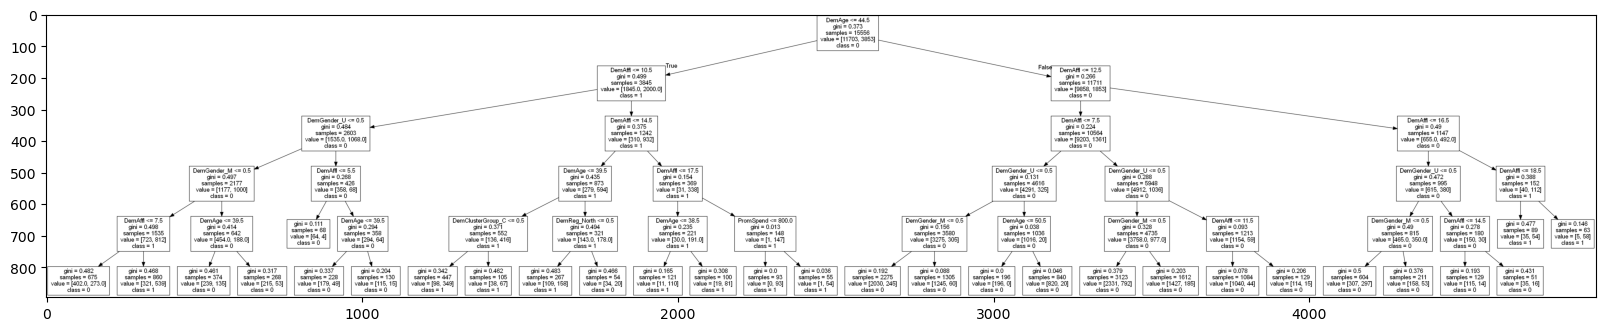

In [98]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)
plt.show()

In [99]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [100]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8118
Precision: 0.7105
Recall.  : 0.4057

 -- test set -- 
Accuracy : 0.8124
Precision: 0.7065
Recall.  : 0.4153


In [101]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[11066  2290]
 [  637  1563]]
[[4730  966]
 [ 285  686]]


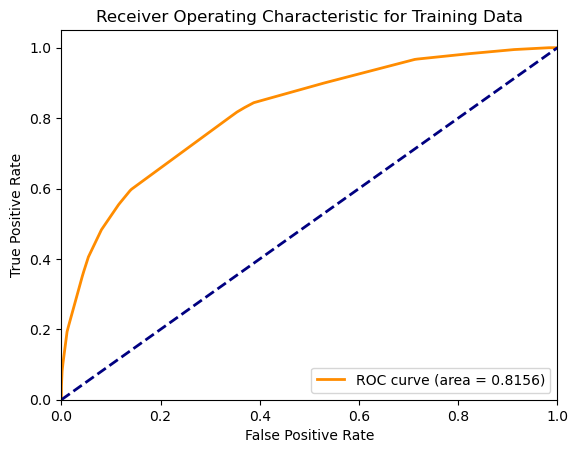

In [102]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train[:, 1])  # Ensure y_train is numeric
roc_auc = roc_auc_score(y_train, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

    importance          feature
1     0.490627           DemAge
0     0.345037          DemAffl
66    0.087039      DemGender_U
65    0.072372      DemGender_M
67    0.002750     DemReg_North
..         ...              ...
28    0.000000  DemCluster_26.0
27    0.000000  DemCluster_25.0
26    0.000000  DemCluster_24.0
25    0.000000  DemCluster_23.0
86    0.000000    PromClass_Tin

[87 rows x 2 columns]


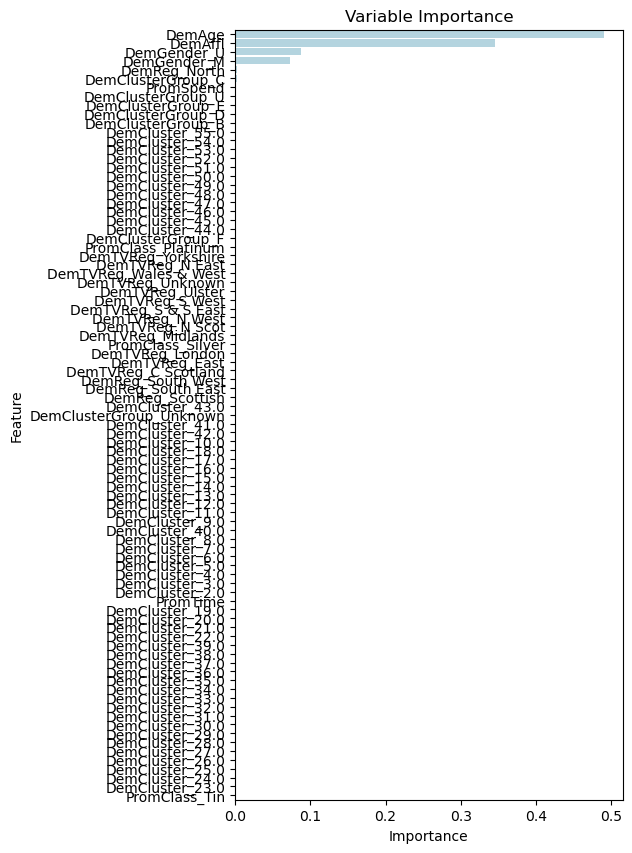

In [103]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

1. **Data Preparation**:  
   - Handled missing values using median/mode imputation.  
   - Encoded categorical variables using dummy variables.  
   - Removed irrelevant features like ID and TargetAmt.  

2. **Model Parameters**:  
   - Classification Tree: Default parameters.  
   - Tuned Classification Tree: Max Depth = 5, Min Samples Split = 10.  
   - Random Forest: n_estimators = 100, max_features = 'sqrt'.  
   - Gradient Boosting: n_estimators = 100, learning_rate = 0.1, max_depth = 3.  

3. **Model Comparison**: See Slide 5.  

4. **Output from Gradient Boosting**:  
   - Feature importance chart (next slide).  
   - Metrics: Test AUC = 0.8253, Precision = 0.7039, Recall = 0.4461.


SyntaxError: invalid syntax (1874449476.py, line 1)